<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/TIC_188768068_Vet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [ ]:
!pip install astroquery

In [4]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.008)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 188768068
period = 2.17796337607701  # Orbital period in days
epoch = 1766.04481375729
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.25]
folded_lc = folded_lc[folded_lc.time > -0.25]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_188768068_all_sector_lightcurve.csv


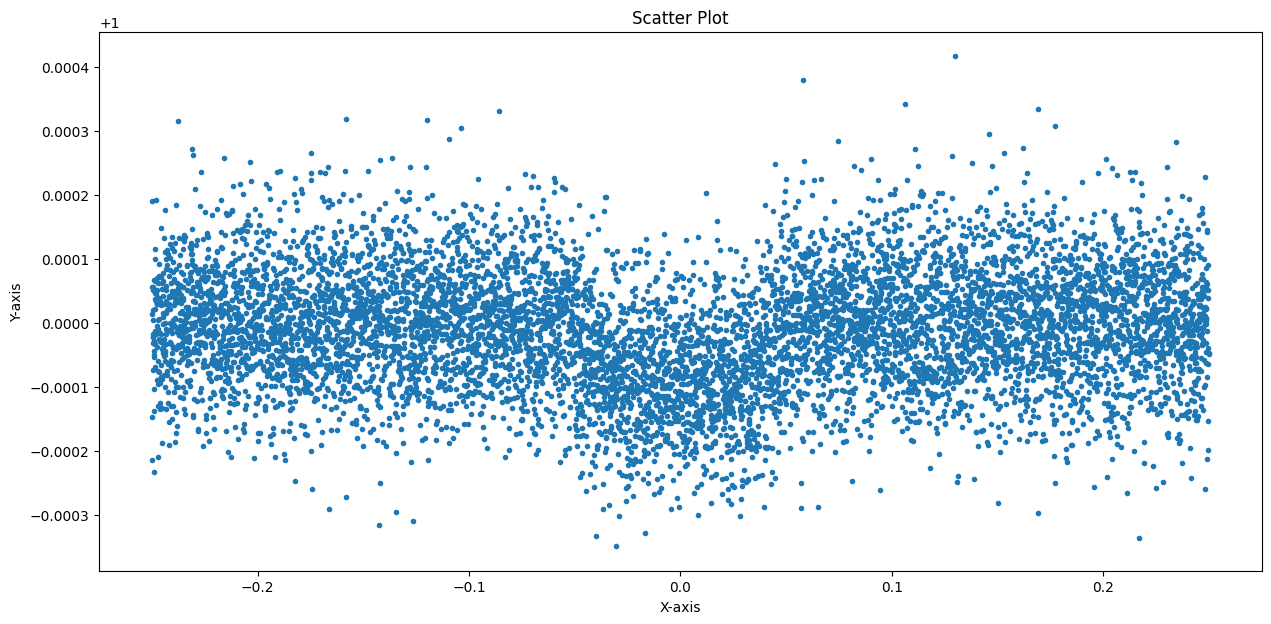

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [36]:
ID = tic_id
sectors = np.array([17, 20, 24, 25, 26]) # <, 40, 47, 50, 51, 53, 54, 57, 60>
target = tr.target(ID=ID, sectors=sectors, search_radius=6) # target radius shorted

<ipython-input-37-1002d4520bc9>:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_17, ap_20, ap_24, ap_25, ap_26]) # <, ap_40, ap_47, ap_50, ap_51, ap_53, ap_54, ap_57, ap_60>


Sector 17


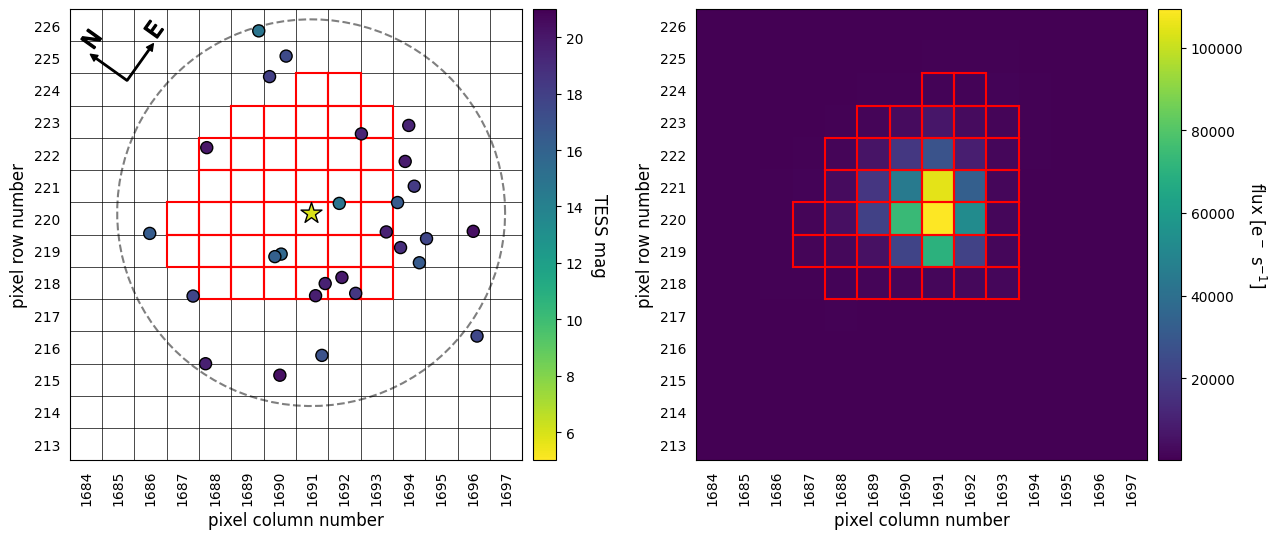

Sector 20


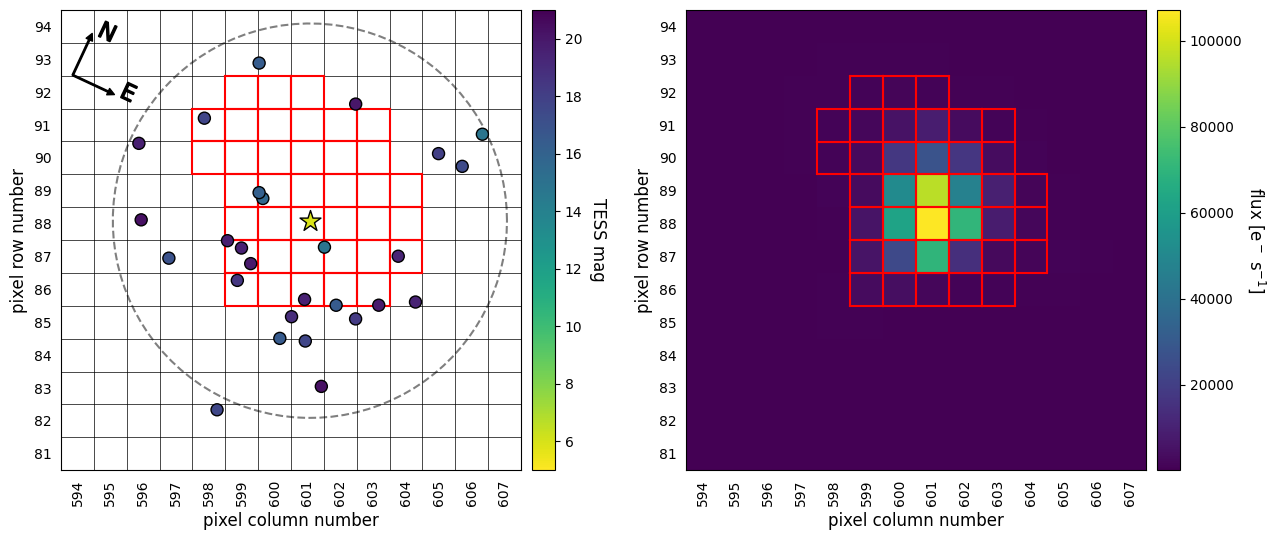

Sector 24


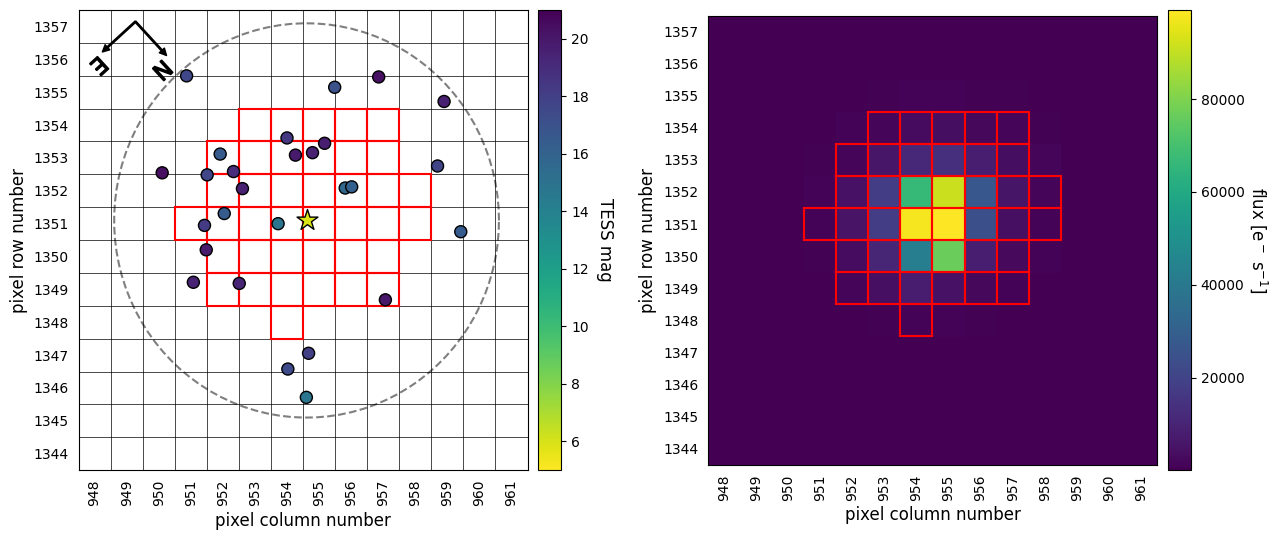

Sector 25


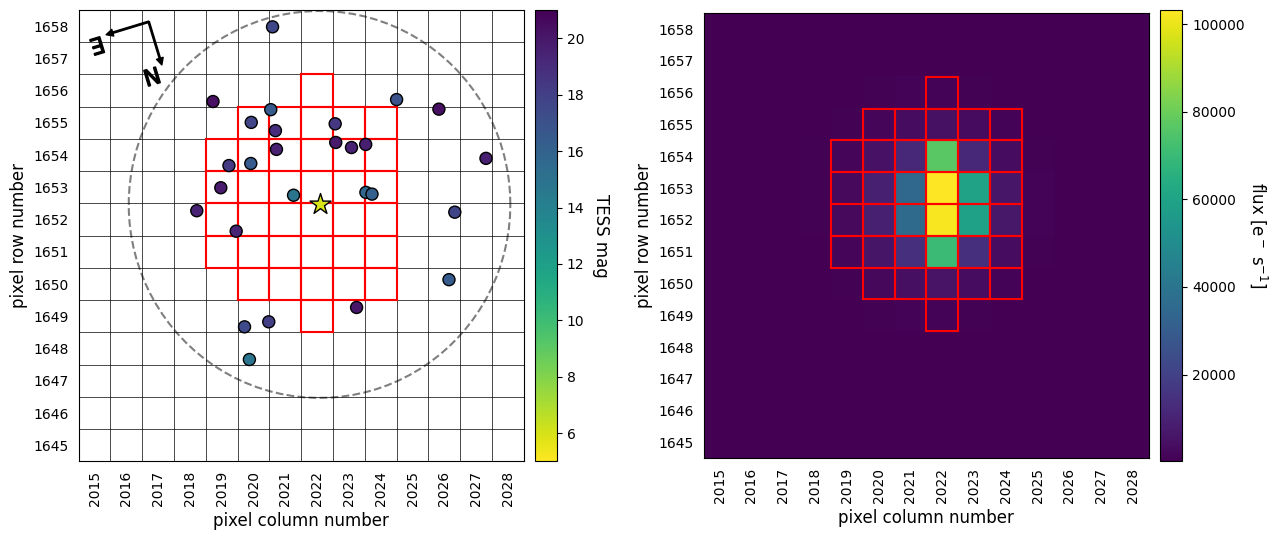

Sector 26


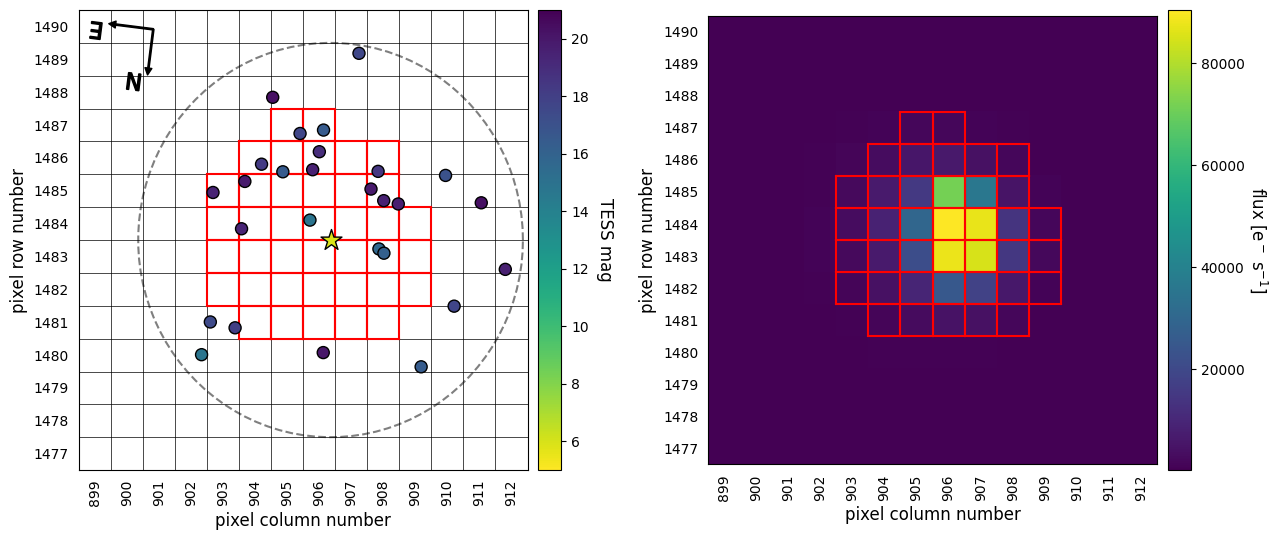

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,188768068,5.8961,5.269,5.026,4.965,261.350233,52.790686,1.04,1.264420,5801.89,36.939900,0.000,0.000
1,188771876,14.8700,14.370,13.965,14.205,261.357022,52.787685,NaN,NaN,NaN,NaN,18.308,126.160
2,1400677728,15.6366,NaN,NaN,NaN,261.335622,52.791085,0.81,0.708128,4927.00,1.009910,31.840,272.593
3,1400677729,16.1646,NaN,NaN,NaN,261.333997,52.791713,0.64,0.720016,4064.00,1.241950,35.538,275.978
4,1400677725,19.8984,NaN,NaN,NaN,261.340089,52.780772,NaN,NaN,NaN,-0.469944,41.969,211.754
5,1400677724,19.5457,NaN,NaN,NaN,261.335922,52.782502,NaN,NaN,NaN,0.995635,42.882,226.608
6,1400677732,19.5070,NaN,NaN,NaN,261.358015,52.778785,NaN,NaN,NaN,0.676113,46.073,158.419
7,1400677723,19.6256,NaN,NaN,NaN,261.331500,52.782729,NaN,NaN,NaN,0.152431,49.840,234.927
8,188768073,16.4817,15.724,15.202,14.945,261.366746,52.779860,0.85,0.819317,5073.00,0.535407,53.025,137.301
9,1400677722,18.4797,NaN,NaN,NaN,261.338622,52.777497,NaN,NaN,NaN,0.342200,53.792,208.038


In [37]:
ap_17 = np.array([[1687.0, 219.0], [1687.0, 220.0], [1688.0, 218.0], [1688.0, 219.0],
      [1688.0, 220.0], [1688.0, 221.0], [1688.0, 222.0], [1689.0, 218.0], [1689.0,
        219.0], [1689.0, 220.0], [1689.0, 221.0], [1689.0, 222.0], [1689.0, 223.0],
      [1690.0, 218.0], [1690.0, 219.0], [1690.0, 220.0], [1690.0, 221.0], [1690.0,
        222.0], [1690.0, 223.0], [1691.0, 218.0], [1691.0, 219.0], [1691.0, 220.0],
      [1691.0, 221.0], [1691.0, 222.0], [1691.0, 223.0], [1691.0, 224.0], [1692.0,
        218.0], [1692.0, 219.0], [1692.0, 220.0], [1692.0, 221.0], [1692.0, 222.0],
      [1692.0, 223.0], [1692.0, 224.0], [1693.0, 218.0], [1693.0, 219.0], [1693.0,
        220.0], [1693.0, 221.0], [1693.0, 222.0], [1693.0, 223.0]])
ap_20 = np.array([[598.0, 90.0],
      [598.0, 91.0], [599.0, 86.0], [599.0, 87.0], [599.0, 88.0], [599.0, 89.0], [
        599.0, 90.0], [599.0, 91.0], [599.0, 92.0], [600.0, 86.0], [600.0, 87.0],
      [600.0, 88.0], [600.0, 89.0], [600.0, 90.0], [600.0, 91.0], [600.0, 92.0], [
        601.0, 86.0], [601.0, 87.0], [601.0, 88.0], [601.0, 89.0], [601.0, 90.0],
      [601.0, 91.0], [601.0, 92.0], [602.0, 86.0], [602.0, 87.0], [602.0, 88.0], [
        602.0, 89.0], [602.0, 90.0], [602.0, 91.0], [603.0, 86.0], [603.0, 87.0],
      [603.0, 88.0], [603.0, 89.0], [603.0, 90.0], [603.0, 91.0], [604.0, 87.0], [
        604.0, 88.0], [604.0, 89.0]])
ap_24 = np.array([[951.0, 1351.0], [952.0, 1349.0], [952.0,
        1350.0], [952.0, 1351.0], [952.0, 1352.0], [952.0, 1353.0], [953.0, 1349.0],
      [953.0, 1350.0], [953.0, 1351.0], [953.0, 1352.0], [953.0, 1353.0], [953.0,
        1354.0], [954.0, 1348.0], [954.0, 1349.0], [954.0, 1350.0], [954.0, 1351.0],
      [954.0, 1352.0], [954.0, 1353.0], [954.0, 1354.0], [955.0, 1349.0], [955.0,
        1350.0], [955.0, 1351.0], [955.0, 1352.0], [955.0, 1353.0], [955.0, 1354.0],
      [956.0, 1349.0], [956.0, 1350.0], [956.0, 1351.0], [956.0, 1352.0], [956.0,
        1353.0], [956.0, 1354.0], [957.0, 1349.0], [957.0, 1350.0], [957.0, 1351.0],
      [957.0, 1352.0], [957.0, 1353.0], [957.0, 1354.0], [958.0, 1351.0], [958.0,
        1352.0]])
ap_25 = np.array([[2019.0, 1651.0], [2019.0, 1652.0], [2019.0, 1653.0], [2019.0,
        1654.0], [2020.0, 1650.0], [2020.0, 1651.0], [2020.0, 1652.0], [2020.0, 1653.0],
      [2020.0, 1654.0], [2020.0, 1655.0], [2021.0, 1650.0], [2021.0, 1651.0], [2021.0,
        1652.0], [2021.0, 1653.0], [2021.0, 1654.0], [2021.0, 1655.0], [2022.0, 1649.0],
      [2022.0, 1650.0], [2022.0, 1651.0], [2022.0, 1652.0], [2022.0, 1653.0], [2022.0,
        1654.0], [2022.0, 1655.0], [2022.0, 1656.0], [2023.0, 1650.0], [2023.0, 1651.0],
      [2023.0, 1652.0], [2023.0, 1653.0], [2023.0, 1654.0], [2023.0, 1655.0], [2024.0,
        1650.0], [2024.0, 1651.0], [2024.0, 1652.0], [2024.0, 1653.0], [2024.0, 1654.0],
      [2024.0, 1655.0]])
ap_26 = np.array([[903.0, 1482.0], [903.0, 1483.0], [903.0, 1484.0], [
        903.0, 1485.0], [904.0, 1481.0], [904.0, 1482.0], [904.0, 1483.0], [904.0,
        1484.0], [904.0, 1485.0], [904.0, 1486.0], [905.0, 1481.0], [905.0, 1482.0],
      [905.0, 1483.0], [905.0, 1484.0], [905.0, 1485.0], [905.0, 1486.0], [905.0,
        1487.0], [906.0, 1481.0], [906.0, 1482.0], [906.0, 1483.0], [906.0, 1484.0],
      [906.0, 1485.0], [906.0, 1486.0], [906.0, 1487.0], [907.0, 1481.0], [907.0,
        1482.0], [907.0, 1483.0], [907.0, 1484.0], [907.0, 1485.0], [907.0, 1486.0],
      [908.0, 1481.0], [908.0, 1482.0], [908.0, 1483.0], [908.0, 1484.0], [908.0,
        1485.0], [908.0, 1486.0], [909.0, 1482.0], [909.0, 1483.0], [909.0, 1484.0]])
# ap_40 = np.array([[1523.0, 1136.0], [1523.0, 1137.0], [1523.0, 1138.0], [1523.0, 1139.0], [
#         1524.0, 1135.0], [1524.0, 1136.0], [1524.0, 1137.0], [1524.0, 1138.0], [1524.0,
#         1139.0], [1524.0, 1140.0], [1524.0, 1141.0], [1525.0, 1135.0], [1525.0, 1136.0],
#       [1525.0, 1137.0], [1525.0, 1138.0], [1525.0, 1139.0], [1525.0, 1140.0], [1525.0,
#         1141.0], [1526.0, 1135.0], [1526.0, 1136.0], [1526.0, 1137.0], [1526.0, 1138.0],
#       [1526.0, 1139.0], [1526.0, 1140.0], [1526.0, 1141.0], [1527.0, 1135.0], [1527.0,
#         1136.0], [1527.0, 1137.0], [1527.0, 1138.0], [1527.0, 1139.0], [1527.0, 1140.0],
#       [1527.0, 1141.0], [1528.0, 1135.0], [1528.0, 1136.0], [1528.0, 1137.0], [1528.0,
#         1138.0], [1528.0, 1139.0], [1528.0, 1140.0], [1528.0, 1141.0], [1529.0, 1136.0],
#       [1529.0, 1137.0], [1529.0, 1138.0]])
# ap_47 = np.array([[350.0, 303.0], [350.0, 304.0], [
#         350.0, 305.0], [350.0, 306.0], [350.0, 307.0], [351.0, 303.0], [351.0, 304.0],
#       [351.0, 305.0], [351.0, 306.0], [351.0, 307.0], [351.0, 308.0], [352.0, 303.0],
#       [352.0, 304.0], [352.0, 305.0], [352.0, 306.0], [352.0, 307.0], [352.0, 308.0],
#       [353.0, 303.0], [353.0, 304.0], [353.0, 305.0], [353.0, 306.0], [353.0, 307.0],
#       [353.0, 308.0], [354.0, 303.0], [354.0, 304.0], [354.0, 305.0], [354.0, 306.0],
#       [354.0, 307.0], [354.0, 308.0], [355.0, 303.0], [355.0, 304.0], [355.0, 305.0],
#       [355.0, 306.0], [355.0, 307.0], [356.0, 304.0], [356.0, 305.0]])
# ap_50 = np.array([[1922.0,
#         438.0], [1922.0, 439.0], [1922.0, 440.0], [1923.0, 438.0], [1923.0, 439.0],
#       [1923.0, 440.0], [1923.0, 441.0], [1923.0, 442.0], [1924.0, 438.0], [1924.0,
#         439.0], [1924.0, 440.0], [1924.0, 441.0], [1924.0, 442.0], [1924.0, 443.0],
#       [1925.0, 438.0], [1925.0, 439.0], [1925.0, 440.0], [1925.0, 441.0], [1925.0,
#         442.0], [1925.0, 443.0], [1926.0, 437.0], [1926.0, 438.0], [1926.0, 439.0],
#       [1926.0, 440.0], [1926.0, 441.0], [1926.0, 442.0], [1926.0, 443.0], [1927.0,
#         437.0], [1927.0, 438.0], [1927.0, 439.0], [1927.0, 440.0], [1927.0, 441.0],
#       [1927.0, 442.0], [1927.0, 443.0], [1928.0, 437.0], [1928.0, 438.0], [1928.0,
#         439.0], [1928.0, 440.0], [1928.0, 441.0], [1929.0, 437.0]])
# ap_51 = np.array([[1134.0,
#         244.0], [1134.0, 245.0], [1134.0, 246.0], [1135.0, 241.0], [1135.0, 242.0],
#       [1135.0, 243.0], [1135.0, 244.0], [1135.0, 245.0], [1135.0, 246.0], [1135.0,
#         247.0], [1136.0, 242.0], [1136.0, 243.0], [1136.0, 244.0], [1136.0, 245.0],
#       [1136.0, 246.0], [1136.0, 247.0], [1137.0, 242.0], [1137.0, 243.0], [1137.0,
#         244.0], [1137.0, 245.0], [1137.0, 246.0], [1137.0, 247.0], [1138.0, 242.0],
#       [1138.0, 243.0], [1138.0, 244.0], [1138.0, 245.0], [1138.0, 246.0], [1138.0,
#         247.0], [1139.0, 243.0], [1139.0, 244.0], [1139.0, 245.0], [1139.0, 246.0],
#       [1139.0, 247.0], [1140.0, 243.0], [1140.0, 244.0], [1140.0, 245.0]])
# ap_53 = np.array([[
#         1050.0, 1419.0], [1050.0, 1420.0], [1050.0, 1421.0], [1050.0, 1422.0], [1050.0,
#         1423.0], [1051.0, 1419.0], [1051.0, 1420.0], [1051.0, 1421.0], [1051.0, 1422.0],
#       [1051.0, 1423.0], [1051.0, 1424.0], [1052.0, 1418.0], [1052.0, 1419.0], [1052.0,
#         1420.0], [1052.0, 1421.0], [1052.0, 1422.0], [1052.0, 1423.0], [1052.0, 1424.0],
#       [1053.0, 1418.0], [1053.0, 1419.0], [1053.0, 1420.0], [1053.0, 1421.0], [1053.0,
#         1422.0], [1053.0, 1423.0], [1053.0, 1424.0], [1054.0, 1418.0], [1054.0, 1419.0],
#       [1054.0, 1420.0], [1054.0, 1421.0], [1054.0, 1422.0], [1054.0, 1423.0], [1054.0,
#         1424.0], [1055.0, 1419.0], [1055.0, 1420.0], [1055.0, 1421.0], [1055.0, 1422.0],
#       [1055.0, 1423.0], [1056.0, 1420.0], [1056.0, 1421.0]])
# ap_54 = np.array([[170.0, 487.0],
#       [171.0, 487.0], [171.0, 488.0], [171.0, 489.0], [171.0, 490.0], [172.0, 487.0],
#       [172.0, 488.0], [172.0, 489.0], [172.0, 490.0], [172.0, 491.0], [172.0, 492.0],
#       [172.0, 493.0], [173.0, 487.0], [173.0, 488.0], [173.0, 489.0], [173.0, 490.0],
#       [173.0, 491.0], [173.0, 492.0], [173.0, 493.0], [174.0, 487.0], [174.0, 488.0],
#       [174.0, 489.0], [174.0, 490.0], [174.0, 491.0], [174.0, 492.0], [174.0, 493.0],
#       [175.0, 487.0], [175.0, 488.0], [175.0, 489.0], [175.0, 490.0], [175.0, 491.0],
#       [175.0, 492.0], [176.0, 487.0], [176.0, 488.0], [176.0, 489.0], [176.0, 490.0],
#       [176.0, 491.0], [177.0, 488.0], [177.0, 489.0]])
# ap_57 = np.array([[1688.0, 665.0], [1689.0,
#         664.0], [1689.0, 665.0], [1689.0, 666.0], [1689.0, 667.0], [1690.0, 663.0],
#       [1690.0, 664.0], [1690.0, 665.0], [1690.0, 666.0], [1690.0, 667.0], [1690.0,
#         668.0], [1691.0, 663.0], [1691.0, 664.0], [1691.0, 665.0], [1691.0, 666.0],
#       [1691.0, 667.0], [1691.0, 668.0], [1692.0, 663.0], [1692.0, 664.0], [1692.0,
#         665.0], [1692.0, 666.0], [1692.0, 667.0], [1692.0, 668.0], [1692.0, 669.0],
#       [1693.0, 663.0], [1693.0, 664.0], [1693.0, 665.0], [1693.0, 666.0], [1693.0,
#         667.0], [1693.0, 668.0], [1693.0, 669.0], [1694.0, 663.0], [1694.0, 664.0],
#       [1694.0, 665.0], [1694.0, 666.0], [1694.0, 667.0], [1694.0, 668.0], [1695.0,
#         663.0], [1695.0, 664.0]])
# ap_60 = np.array([[518.0, 312.0], [518.0, 313.0], [518.0, 314.0],
#       [518.0, 315.0], [518.0, 316.0], [519.0, 312.0], [519.0, 313.0], [519.0, 314.0],
#       [519.0, 315.0], [519.0, 316.0], [519.0, 317.0], [520.0, 312.0], [520.0, 313.0],
#       [520.0, 314.0], [520.0, 315.0], [520.0, 316.0], [520.0, 317.0], [520.0, 318.0],
#       [521.0, 312.0], [521.0, 313.0], [521.0, 314.0], [521.0, 315.0], [521.0, 316.0],
#       [521.0, 317.0], [522.0, 312.0], [522.0, 313.0], [522.0, 314.0], [522.0, 315.0],
#       [522.0, 316.0], [522.0, 317.0], [523.0, 313.0], [523.0, 314.0], [523.0, 315.0],
#       [523.0, 316.0], [524.0, 313.0]])

apertures = np.array([ap_17, ap_20, ap_24, ap_25, ap_26]) # <, ap_40, ap_47, ap_50, ap_51, ap_53, ap_54, ap_57, ap_60>

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [38]:
target.calc_depths(tdepth=0.06502, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,188768068,5.8961,5.269,5.026,4.965,261.350233,52.790686,1.04,1.264420,5801.89,36.939900,0.000,0.000,9.994191e-01,0.065058
1,188771876,14.8700,14.370,13.965,14.205,261.357022,52.787685,NaN,NaN,NaN,NaN,18.308,126.160,2.560206e-04,0.000000
2,1400677728,15.6366,NaN,NaN,NaN,261.335622,52.791085,0.81,0.708128,4927.00,1.009910,31.840,272.593,1.215657e-04,0.000000
3,1400677729,16.1646,NaN,NaN,NaN,261.333997,52.791713,0.64,0.720016,4064.00,1.241950,35.538,275.978,7.338326e-05,0.000000
4,1400677725,19.8984,NaN,NaN,NaN,261.340089,52.780772,NaN,NaN,NaN,-0.469944,41.969,211.754,2.213508e-06,0.000000
5,1400677724,19.5457,NaN,NaN,NaN,261.335922,52.782502,NaN,NaN,NaN,0.995635,42.882,226.608,2.914624e-06,0.000000
6,1400677732,19.5070,NaN,NaN,NaN,261.358015,52.778785,NaN,NaN,NaN,0.676113,46.073,158.419,2.919080e-06,0.000000
7,1400677723,19.6256,NaN,NaN,NaN,261.331500,52.782729,NaN,NaN,NaN,0.152431,49.840,234.927,2.291510e-06,0.000000
8,188768073,16.4817,15.724,15.202,14.945,261.366746,52.779860,0.85,0.819317,5073.00,0.535407,53.025,137.301,4.271089e-05,0.000000
9,1400677722,18.4797,NaN,NaN,NaN,261.338622,52.777497,NaN,NaN,NaN,0.342200,53.792,208.038,6.650088e-06,0.000000


In [39]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 188768068.
Calculating EB and EBx2P scenario probabilities for 188768068.
Calculating PTP scenario probability for 188768068.
Calculating PEB and PEBx2P scenario probabilities for 188768068.
Calculating STP scenario probability for 188768068.
Calculating SEB and SEBx2P scenario probabilities for 188768068.
Calculating DTP scenario probability for 188768068.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 188768068.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 188768068.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 188768068.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


CPU times: user 6min 40s, sys: 7.94 s, total: 6min 48s
Wall time: 4min 25s


In [40]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.43647935
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,188768068,TP,1.040000,1.264420,2.177963,83.496803,0.486555,0.242023,86.629965,1.234542,0.000000,0.000000,4.522848e-01
1,188768068,EB,1.040000,1.264420,2.177963,69.758068,1.663057,0.354245,45.433113,0.000000,0.825168,0.851535,0.000000e+00
2,188768068,EBx2P,1.040000,1.264420,4.355927,83.712782,0.691807,0.756720,198.047197,0.000000,1.031507,1.125060,0.000000e+00
3,188768068,PTP,1.040000,1.264420,2.177963,83.383442,0.558471,0.149816,107.696809,1.249768,0.000000,0.000000,1.281660e-02
4,188768068,PEB,1.040000,1.264420,2.177963,66.215077,1.376597,0.519604,71.382249,0.000000,0.902941,0.941204,0.000000e+00
5,188768068,PEBx2P,1.040000,1.264420,4.355927,84.525005,0.471054,0.773625,185.935354,0.000000,1.029711,1.122471,0.000000e+00
6,188768068,STP,0.707756,0.738895,2.177963,86.915604,0.221997,0.567113,134.826641,1.818229,0.000000,0.000000,4.364793e-01
7,188768068,SEB,0.115189,0.140770,2.177963,87.263537,1.240259,0.025971,258.805523,0.000000,0.013103,0.100000,0.000000e+00
8,188768068,SEBx2P,0.124896,0.153010,4.355927,88.517351,0.129469,0.929860,164.990054,0.000000,0.119575,0.146393,1.611193e-62
9,188768068,DTP,1.040000,1.264420,2.177963,84.187039,0.282654,0.507522,88.098904,1.196231,0.000000,0.000000,9.841926e-02


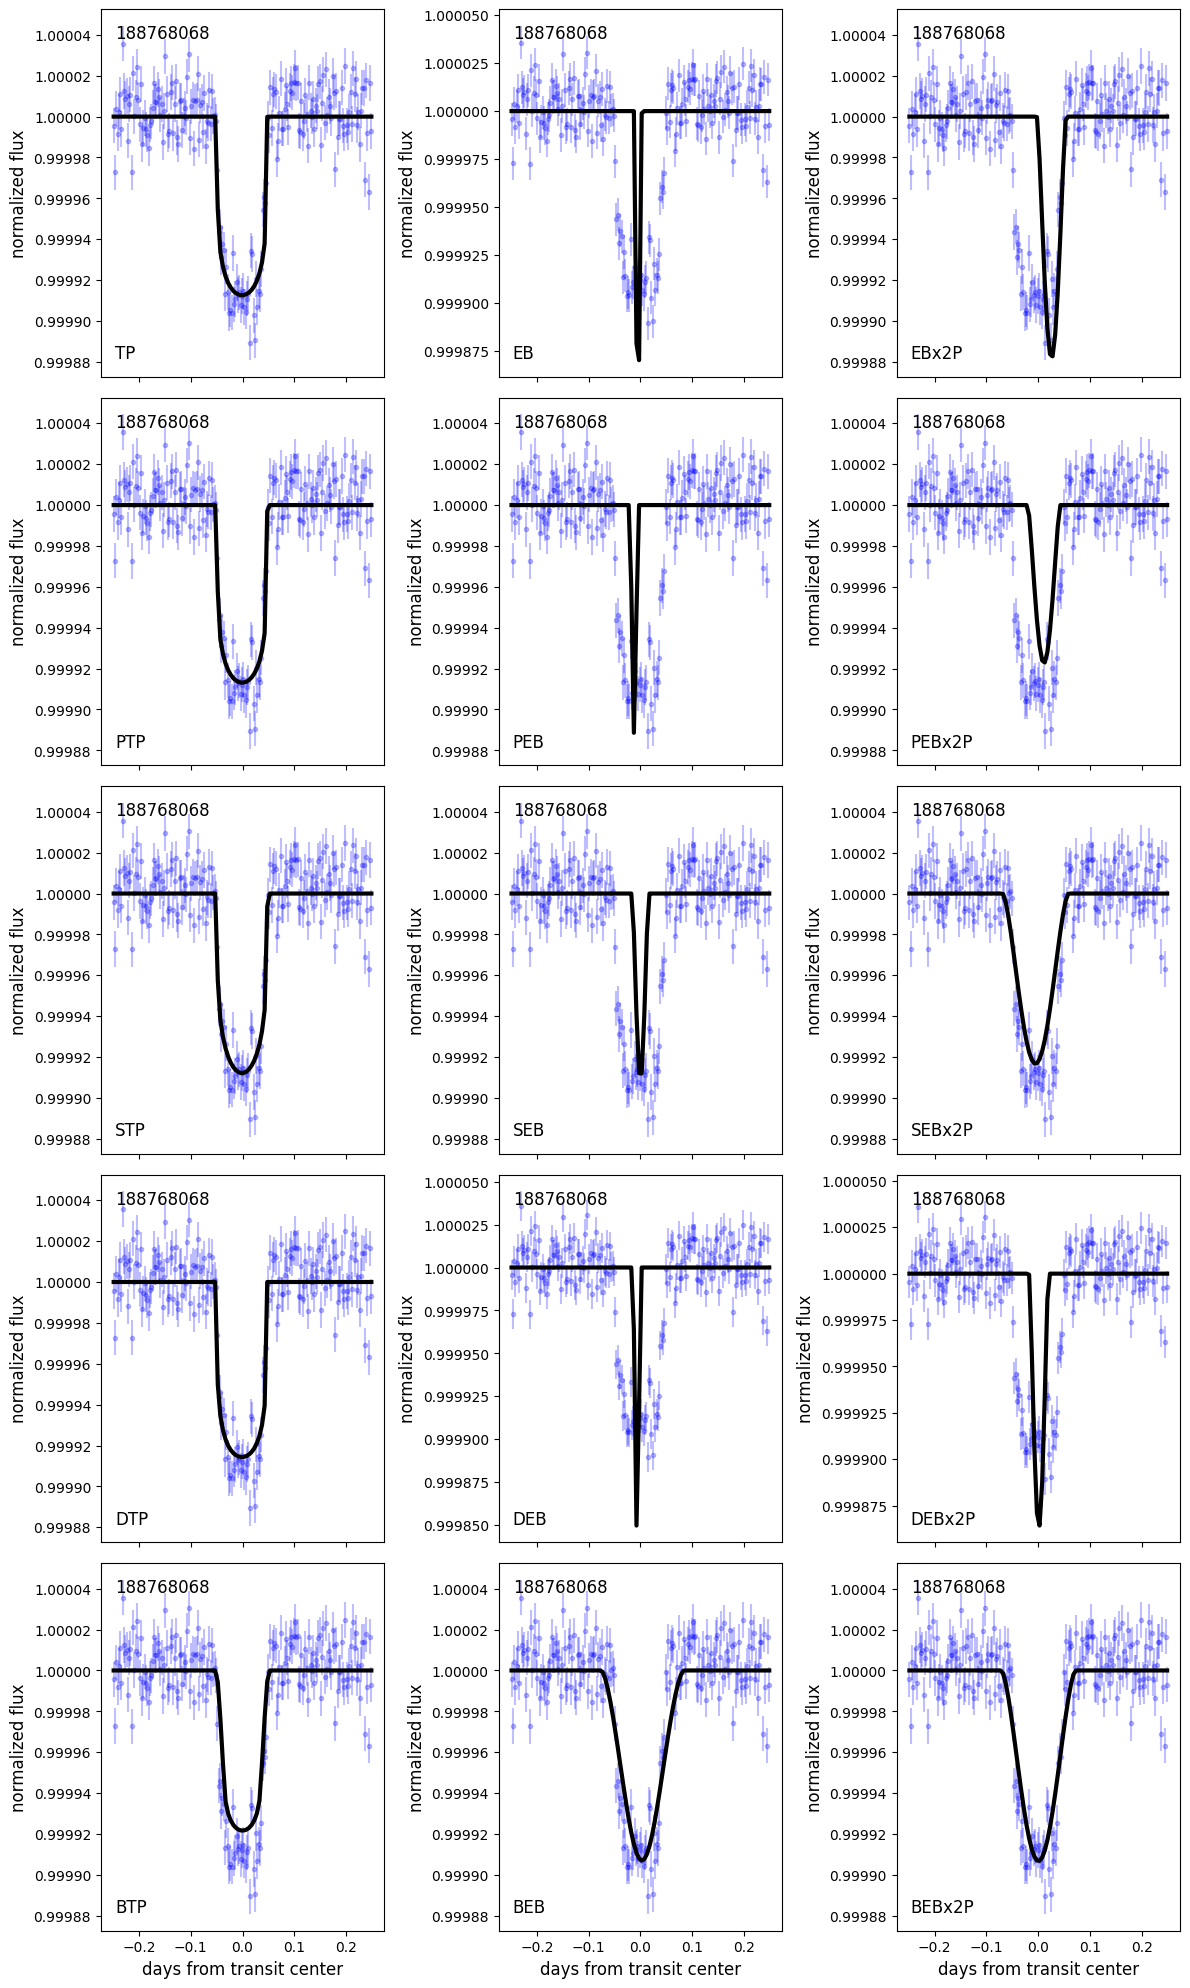

In [41]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [42]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_me

FPP = 0.06636784704716159 +/- 0.05963045243563799
NFPP = 0.0 +/- 0.0
CPU times: user 2h 12min 29s, sys: 2min 16s, total: 2h 14min 45s
Wall time: 1h 27min 14s


Our final conclusion about this specified planet of TIC 188768068 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).